- OpenClassrooms Project 6, Data Scientist
- Author : Oumeima EL GHARBI
- Date : October, November 2022

### Importing libraries

In [1]:
import pandas as pd
%reset -f

import warnings
warnings.filterwarnings(action="ignore")

from functions import *
from os import listdir
from os.path import isfile, join

# NLP
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

# import spacy

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud ### WARNINGS !!
from PIL import Image

# import plotly as px

from pandarallel import pandarallel

%matplotlib inline
%autosave 300

Autosaving every 300 seconds


In [2]:
# Starting time
t0 = time()

input_path = "./dataset/"
text_path = input_path + "/text/"
images_path = input_path + "/images/"

input_text_filename = "source/flipkart_com-ecommerce_sample.csv"
input_text_file = "{}{}".format(text_path, input_text_filename)

#input_filename = "input.csv"
#input_dataset_file = "{}{}".format(input_path, input_filename)

#output_path = "./dataset/cleaned/"
#output_filename = "output.csv"
#output_dataset_file = "{}{}".format(output_path, output_filename)

## Part I : Exploratory Data Analysis

### Importing the images' description from a csv file

##### Getting the images' description

In [3]:
data_text = pd.read_csv(input_text_file)

In [4]:
data_text.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [5]:
all_text_id = data_text['uniq_id']
print("We have", all_text_id.unique().shape[0], "unique ids for the textual descriptions")

We have 1050 unique ids for the textual descriptions


##### Getting the images' id

In [6]:
print("We read the folder in which we have all the csv files.")

all_images_id = [f for f in listdir(images_path) if isfile(join(images_path, f))]

print("We have locally", len(all_images_id), "images.")

We read the folder in which we have all the csv files.
We have locally 1050 images.


##### Checking that the 1050 images match the textual descriptions

In [7]:
df_images_id = pd.DataFrame({"id": [img[:-4] for img in all_images_id]}) # :-4 o remove the .jpg of the string

df_text_id = all_text_id.copy()
# transforming the pandas Series into a Df
df_text_id = pd.DataFrame({"id": all_text_id})

In [8]:
df_text_id.head()

,id
0,55b85ea15a1536d46b7190ad6fff8ce7
1,7b72c92c2f6c40268628ec5f14c6d590
2,64d5d4a258243731dc7bbb1eef49ad74
3,d4684dcdc759dd9cdf41504698d737d8
4,6325b6870c54cd47be6ebfbffa620ec7


In [9]:
df_images_id.head()

,id
0,009099b1f6e1e8f893ec29a7023153c4
1,0096e89cc25a8b96fb9808716406fe94
2,00cbbc837d340fa163d11e169fbdb952
3,00d84a518e0550612fcfcba3b02b6255
4,00e966a5049a262cfc72e6bbf68b80e7


In [10]:
df_concat = pd.concat([df_images_id, df_text_id]) #.drop_duplicates(keep=False)
display(df_concat.shape)

(2100, 1)

In [11]:
df_concat = pd.concat([df_images_id, df_text_id]).drop_duplicates(keep=False)
display(df_concat)

,id


We have checked that every image that we have locally matches a description that can be found in the csv file.

##### Exploration of the dataset that contains the descriptions

In [12]:
data_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [13]:
data_text.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

In [14]:
data_text

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ..."
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >.

##### Checking that the uniq_id = image without .jpg

In [15]:
dataset_ids = data_text.copy()
dataset_ids = dataset_ids[["uniq_id", "image"]]

#dataset_ids["image_without_jpg"] = dataset_ids["image"].str.slice(stop=-4)
dataset_ids["Matches"] = dataset_ids["uniq_id"] == dataset_ids["image"].str.slice(stop=-4)

dataset_ids.head()

,uniq_id,image,Matches
0,55b85ea15a1536d46b7190ad6fff8ce7,55b85ea15a1536d46b7190ad6fff8ce7.jpg,True
1,7b72c92c2f6c40268628ec5f14c6d590,7b72c92c2f6c40268628ec5f14c6d590.jpg,True
2,64d5d4a258243731dc7bbb1eef49ad74,64d5d4a258243731dc7bbb1eef49ad74.jpg,True
3,d4684dcdc759dd9cdf41504698d737d8,d4684dcdc759dd9cdf41504698d737d8.jpg,True
4,6325b6870c54cd47be6ebfbffa620ec7,6325b6870c54cd47be6ebfbffa620ec7.jpg,True


In [16]:
print("We checked if the unique id matches the image name for all the data and we got only : ", dataset_ids["Matches"].unique())

We checked if the unique id matches the image name for all the data and we got only :  [ True]


#### Cleaning


In [17]:
#Traitement des catégories
def split_categories(category, level):
    '''FOnction qui affiche les '''
    category = category.split('["')[1].split('"]')[0]
    cat = category.split(' >> ')
    if(len(cat)) < 3:
        cat = [cat[0], cat[1], 'None']
        if(len(cat))<2:
            cat = [cat[0], 'None', 'None']
    return cat[level]

def split_categories_1(category):
    return split_categories(category, 0)

def split_categories_2(category):
    return split_categories(category, 1)

def split_categories_3(category):
    return split_categories(category, 2)

def detail_categories(dataframe):
    dataframe['category_1'] = dataframe['product_category_tree'].apply(split_categories_1)
    dataframe['category_2'] = dataframe['product_category_tree'].apply(split_categories_2)
    dataframe['category_3'] = dataframe['product_category_tree'].apply(split_categories_3)
    return dataframe.drop(['product_category_tree'], axis=1)


data_cleaned = detail_categories(data_text)

In [18]:

data_text["product_category_tree"][0]
data_text["product_category_tree"][300]

first_category = data_text["product_category_tree"]

# we cut the sentences at every >>
first_category_list = first_category.str.split(">>")

first_category_list.str[0].str.slice(start=2)  # start after ["

data = data_text.copy()
data["first_category"] = data["product_category_tree"].str.split(">>").str[0].str.slice(start=2)

data["first_category"].unique()

second_category = data_text["product_category_tree"]

# we cut the sentences at every >>
second_category_list = second_category.str.split(">>")

second_category_list
second_category_list.str[1]  #.str.strip() # strip to remove blank space

second_category_list.str[1].unique()

data["second_category"] = data["product_category_tree"].str.split(">>").str[1]  #.strip()

data["second_category"].unique()

data["third_category"] = data["product_category_tree"].str.split(">>").str[2]  #.strip()

data["third_category"].unique()

array([' Curtains ', ' Baby Bath Towels ', ' Bedsheets ',
       ' Maserati Time Wrist Watches"]', ' Camerii Wrist Watches"]',
       ' T STAR Wrist Watches"]', ' Alfajr Wrist Watches"]',
       ' TAG Heuer Wrist Watches"]', ' Calibro Wrist Watches"]',
       ' Cartier Wrist Watches"]', ' Lois Caron Wrist Watches"]',
       ' Titan Wrist Watches"]', ' Srushti Art Jewelry Wrist Watches"]',
       ' Escort Wrist Watches"]', ' Jack klein Wrist Watches"]',
       ' North Moon Wrist Watches"]', ' Franck Bella Wrist Watches"]',
       ' Ridas Wrist Watches"]', ' Skmei Wrist Watches"]',
       ' Now Wrist Watches"]', ' fastrack Wrist Watches"]',
       ' Disney Wrist Watches"]', ' Vizion Wrist Watches"]',
       ' Elantra Wrist Watches"]', ' Marvel Wrist Watches"]',
       ' Lenco Wrist Watches"]', ' D\'Signer Wrist Watches"]',
       ' Diwan Sets ', ' Duvet Covers ', ' Bath Mats"]',
       ' Home Fragrances ', ' Jug, Glass & Tray Sets ', ' Bulbs ',
       ' JMD Printed Cushions Cover (Pack o

In [19]:
data_cleaned[data_cleaned["uniq_id"] == "06749cbff1487f470438823f6952cfd1"]

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category_1,category_2,category_3
139,06749cbff1487f470438823f6952cfd1,2015-12-01 12:40:44 +0000,http://www.flipkart.com/prithish-hop-jump-skip...,Prithish Hop Jump Skip Black Ceramic Mug,MUGEB7J7RZDRUQH9,699.0,275.0,06749cbff1487f470438823f6952cfd1.jpg,False,Prithish Hop Jump Skip Black Ceramic Mug (330 ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Type"", ""va...",Kitchen & Dining,Coffee Mugs,Prithish Coffee Mugs


In [20]:
data_cleaned.to_csv("dataset/text/cleaned/data_cleaned.csv", index=False, sep=',')

##### Exploration

In [21]:
#pd.set_option('max_colwidth', None)
data_text["product_category_tree"].head()

0    ["Home Furnishing >> Curtains & Accessories >>...
1    ["Baby Care >> Baby Bath & Skin >> Baby Bath T...
2    ["Baby Care >> Baby Bath & Skin >> Baby Bath T...
3    ["Home Furnishing >> Bed Linen >> Bedsheets >>...
4    ["Home Furnishing >> Bed Linen >> Bedsheets >>...
Name: product_category_tree, dtype: object

In [22]:
data_text["product_specifications"].head()

0    {"product_specification"=>[{"key"=>"Brand", "v...
1    {"product_specification"=>[{"key"=>"Machine Wa...
2    {"product_specification"=>[{"key"=>"Material",...
3    {"product_specification"=>[{"key"=>"Brand", "v...
4    {"product_specification"=>[{"key"=>"Machine Wa...
Name: product_specifications, dtype: object

## Part II : Text processing

##### Downloads and options

In [23]:
# download

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oumei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\oumei\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\oumei\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\oumei\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [24]:
# pandarallel
pandarallel.initialize(progress_bar=True, nb_workers=6
                       #, verbose=1
)

INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [25]:
# init sns
sns.set()

##### Loading data

In [26]:
input_path = "dataset/text/cleaned/"
data_filename = input_path + "data_cleaned.csv"
data = pd.read_csv(data_filename)

In [27]:
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,category_1,category_2,category_3
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Curtains & Accessories,Curtains
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Baby Bath & Skin,Baby Bath Towels
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,Baby Bath & Skin,Baby Bath Towels
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Bed Linen,Bedsheets
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,Bed Linen,Bedsheets


In [28]:
data = data[["description", "category_1"]]
data = data.rename(columns={"description": "text", "category_1": "target"})

In [29]:
data.head()

,text,target
0,Key Features of Elegance Polyester Multicolor ...,Home Furnishing
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing
4,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing


In [30]:
data.shape

(1050, 2)

### Cleaning

#### Work on a specific document

In [31]:
# select a random document

doc = data.text.sample(1) # get a row
doc = doc.values[0] # get a numpy array
doc

'Buy Netgear AC 750 Wi-Fi Range Extender only for Rs. 5999 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!'

##### 1) Lower

In [32]:
doc = doc.lower()
doc

'buy netgear ac 750 wi-fi range extender only for rs. 5999 from flipkart.com. only genuine products. 30 day replacement guarantee. free shipping. cash on delivery!'

##### 2) Tokenization

In [33]:
tokens = word_tokenize(doc)
tokens

['buy',
 'netgear',
 'ac',
 '750',
 'wi-fi',
 'range',
 'extender',
 'only',
 'for',
 'rs',
 '.',
 '5999',
 'from',
 'flipkart.com',
 '.',
 'only',
 'genuine',
 'products',
 '.',
 '30',
 'day',
 'replacement',
 'guarantee',
 '.',
 'free',
 'shipping',
 '.',
 'cash',
 'on',
 'delivery',
 '!']

In [34]:
len(tokens)

31

In [35]:
len(set(tokens))

26

In [36]:
def display_tokens_info(tokens):
    """
    Displays information about corpus
    :param tokens:
    :return:
    """
    print(f"nb tokens {len(tokens)}, nb tokens uniques {len(set(tokens))}")
    print(tokens[:30])
    print(list(set(tokens[:30])))

In [37]:
display_tokens_info(tokens)

nb tokens 31, nb tokens uniques 26
['buy', 'netgear', 'ac', '750', 'wi-fi', 'range', 'extender', 'only', 'for', 'rs', '.', '5999', 'from', 'flipkart.com', '.', 'only', 'genuine', 'products', '.', '30', 'day', 'replacement', 'guarantee', '.', 'free', 'shipping', '.', 'cash', 'on', 'delivery']
['750', 'day', 'flipkart.com', 'buy', 'from', 'delivery', '.', 'replacement', '30', 'products', 'extender', 'genuine', 'only', 'netgear', 'cash', 'rs', 'for', 'wi-fi', 'on', 'guarantee', '5999', 'free', 'ac', 'range', 'shipping']


In [38]:
# an other tokenize

tokens = wordpunct_tokenize(doc)
display_tokens_info(tokens)

nb tokens 35, nb tokens uniques 29
['buy', 'netgear', 'ac', '750', 'wi', '-', 'fi', 'range', 'extender', 'only', 'for', 'rs', '.', '5999', 'from', 'flipkart', '.', 'com', '.', 'only', 'genuine', 'products', '.', '30', 'day', 'replacement', 'guarantee', '.', 'free', 'shipping']
['750', 'day', 'buy', 'from', 'fi', '.', 'replacement', '30', '-', 'products', 'extender', 'genuine', 'only', 'com', 'netgear', 'rs', 'for', 'wi', 'guarantee', '5999', 'free', 'ac', 'range', 'shipping', 'flipkart']


##### 3) Stopwords

In [39]:
# stop_words
global stop_words
stop_words = set(stopwords.words('english'))
print(stop_words)

{'will', 'd', 'now', 'its', 'me', 'my', "you've", "it's", 'and', 'further', 'their', 'themselves', 'has', 'of', 'this', 'too', 'yourself', 'our', 'some', 'shouldn', "mightn't", 'these', 'do', 'haven', 'am', 'here', 'isn', 'shan', 'ourselves', 'being', 'if', 't', 'while', 'll', 'a', "aren't", 'he', 'than', 'to', 'been', "shouldn't", 'were', 'but', 'so', 'ma', 'we', 'more', "you'll", 'over', "you'd", 's', "you're", 'before', 'won', 'or', 'whom', 'wasn', 'up', 'it', 'you', 'doesn', 'yours', 'myself', 'off', "isn't", 'was', 'him', 'very', 'under', 'same', 'who', 'had', 'each', "doesn't", 'hadn', "haven't", 'with', 'ain', 'on', 'didn', 'any', "that'll", 'itself', 'have', 'hasn', 'does', 'doing', 'why', 'by', 're', 'through', 'in', 'nor', 'aren', 'your', 'what', "don't", 'all', 'such', "hasn't", 'just', 'after', 'from', 'not', 'can', 'theirs', 'be', 'once', 'mustn', 've', 'that', 'as', 'an', 'no', "shan't", 'other', 'mightn', "won't", 'her', 'few', "should've", 'between', 'they', 'm', 'becau

In [40]:
tokens = [w for w in tokens if w not in stop_words]

In [41]:
display_tokens_info(tokens)

nb tokens 30, nb tokens uniques 25
['buy', 'netgear', 'ac', '750', 'wi', '-', 'fi', 'range', 'extender', 'rs', '.', '5999', 'flipkart', '.', 'com', '.', 'genuine', 'products', '.', '30', 'day', 'replacement', 'guarantee', '.', 'free', 'shipping', '.', 'cash', 'delivery', '!']
['750', 'day', 'buy', 'fi', 'delivery', '.', 'replacement', '30', '-', 'products', 'extender', 'genuine', 'com', 'netgear', 'cash', 'rs', 'wi', 'guarantee', '5999', '!', 'free', 'ac', 'range', 'shipping', 'flipkart']


In [42]:
# an other tokenizer

tokenizer = RegexpTokenizer(r"\w+")
tokens = tokenizer.tokenize(doc)
display_tokens_info(tokens)

nb tokens 27, nb tokens uniques 26
['buy', 'netgear', 'ac', '750', 'wi', 'fi', 'range', 'extender', 'only', 'for', 'rs', '5999', 'from', 'flipkart', 'com', 'only', 'genuine', 'products', '30', 'day', 'replacement', 'guarantee', 'free', 'shipping', 'cash', 'on', 'delivery']
['750', 'day', 'buy', 'from', 'fi', 'delivery', 'replacement', '30', 'products', 'extender', 'genuine', 'only', 'com', 'netgear', 'cash', 'rs', 'for', 'on', 'wi', 'guarantee', '5999', 'free', 'ac', 'range', 'shipping', 'flipkart']


In [43]:
# remove stopwords

tokens = [w for w in tokens if w not in stop_words]
display_tokens_info(tokens)

nb tokens 22, nb tokens uniques 22
['buy', 'netgear', 'ac', '750', 'wi', 'fi', 'range', 'extender', 'rs', '5999', 'flipkart', 'com', 'genuine', 'products', '30', 'day', 'replacement', 'guarantee', 'free', 'shipping', 'cash', 'delivery']
['750', 'day', 'buy', 'fi', 'delivery', 'replacement', '30', 'products', 'extender', 'genuine', 'com', 'netgear', 'cash', 'rs', 'wi', 'guarantee', '5999', 'free', 'ac', 'range', 'shipping', 'flipkart']


##### 4) First cleaning function

In [44]:
def process_text_1(doc, rejoin=False):
    """
    basic function of text processing

    :param doc:
    :param rejoin:
    :return:
    """
    # lower
    doc = doc.lower().strip()

    # tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)

    # stop words
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]

    if rejoin:
        return " ".join(cleaned_tokens_list) # return a string with each token separated by a blank space
    return cleaned_tokens_list

In [45]:
tokens = process_text_1(doc)
display_tokens_info(tokens)

nb tokens 22, nb tokens uniques 22
['buy', 'netgear', 'ac', '750', 'wi', 'fi', 'range', 'extender', 'rs', '5999', 'flipkart', 'com', 'genuine', 'products', '30', 'day', 'replacement', 'guarantee', 'free', 'shipping', 'cash', 'delivery']
['750', 'day', 'buy', 'fi', 'delivery', 'replacement', '30', 'products', 'extender', 'genuine', 'com', 'netgear', 'cash', 'rs', 'wi', 'guarantee', '5999', 'free', 'ac', 'range', 'shipping', 'flipkart']


#### Working on the entire corpus

##### 1) Build raw corpus

In [46]:
# join all corpus

raw_corpus = "".join(data.text.values)
raw_corpus[:1_000]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [47]:
len(raw_corpus)

497512

In [48]:
# process the corpus

corpus = process_text_1(raw_corpus)
display_tokens_info(corpus)

nb tokens 61452, nb tokens uniques 6165
['key', 'features', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'cm', 'height', 'pack', '2', 'price', 'rs', '899', 'curtain', 'enhances', 'look', 'interiors']
['2', 'features', 'curtain', 'interiors', 'pack', '899', 'look', 'enhances', 'key', 'eyelet', 'rs', 'polyester', 'multicolor', 'floral', 'height', 'elegance', 'price', 'door', 'cm', 'abstract', '213']


In [49]:
# value counts

tmp = pd.Series(corpus).value_counts()
tmp

rs           911
products     631
free         618
delivery     567
cash         564
            ... 
drawerkey      1
680            1
roundbuy       1
homeehub       1
dell           1
Length: 6165, dtype: int64

In [50]:
# visualization

#sns.barplot(x=tmp.index, y=tmp.values)

In [51]:
# 30th most common tokens

tmp.head(30)

rs                911
products          631
free              618
delivery          567
cash              564
genuine           564
shipping          564
replacement       559
buy               543
day               540
cm                532
1                 524
30                498
flipkart          475
guarantee         471
com               468
online            396
features          395
price             352
watch             329
color             328
baby              320
mug               318
pack              317
material          312
set               306
type              304
cotton            299
specifications    295
box               291
dtype: int64

In [52]:
# 30th last common tokens

tmp.tail(30)

md199hn                 1
seaterspecifications    1
explode                 1
shot                    1
huawei                  1
sport                   1
ski                     1
1399                    1
ac2400                  1
bornbabykids            1
552                     1
4509                    1
ws331c                  1
architecture            1
5199                    1
socket                  1
1150key                 1
6428nc                  1
585                     1
clothing                1
needybee                1
752dru                  1
susceptible             1
linespecifications      1
esteem                  1
drawerkey               1
680                     1
roundbuy                1
homeehub                1
dell                    1
dtype: int64

In [53]:
tmp.describe()

count    6165.000000
mean        9.967883
std        38.897271
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       911.000000
dtype: float64

In [54]:
# sns.displot(tmp)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

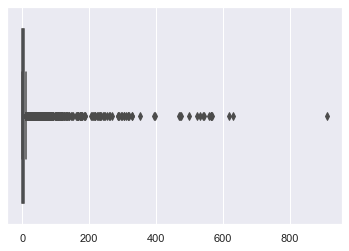

In [55]:
sns.boxplot(tmp) # 'bad distribution'

##### 2) List rare tokens

In [56]:
# unique words --> not useful

tmp = pd.Series(corpus).value_counts()
list_unique_words = tmp[tmp == 1]
list_unique_words[:30]

paraben         1
vinegar         1
glycol          1
oodles          1
ingredients     1
skip            1
bullshit        1
word            1
soapking        1
hop             1
arabicoudh      1
grass           1
students        1
979             1
leafs           1
vegetarian      1
length225       1
6645            1
quantities      1
sscp            1
582             1
appreciation    1
flawers         1
tulip           1
playing         1
balls           1
ballsech        1
repeatedly      1
pmr1918         1
pmba1872        1
dtype: int64

In [57]:
len(list_unique_words)

2114

In [58]:
list_unique_words = list(list_unique_words.index)
list_unique_words[:30]

['paraben',
 'vinegar',
 'glycol',
 'oodles',
 'ingredients',
 'skip',
 'bullshit',
 'word',
 'soapking',
 'hop',
 'arabicoudh',
 'grass',
 'students',
 '979',
 'leafs',
 'vegetarian',
 'length225',
 '6645',
 'quantities',
 'sscp',
 '582',
 'appreciation',
 'flawers',
 'tulip',
 'playing',
 'balls',
 'ballsech',
 'repeatedly',
 'pmr1918',
 'pmba1872']

In [59]:
# save it for later

tmp = pd.DataFrame({"words": list_unique_words})
tmp.to_csv("dataset/text/cleaned/unique_words.csv", index=False)

In [60]:
# idem for 2 times

tmp = pd.Series(corpus).value_counts()
list_max_2_words = tmp[tmp <= 2]
list_max_2_words[:30]

pokizo                2
knows                 2
deluxe                2
prestige              2
birds                 2
thus                  2
styles                2
880                   2
dean                  2
stage                 2
plus                  2
neckspecifications    2
welcomed              2
milton                2
camerii               2
zipper                2
hourglass             2
pressure              2
bib                   2
850                   2
dat                   2
neckerchew            2
chompers              2
v220w                 2
fashionin             2
velcro                2
cheeky                2
bsf                   2
hilton                2
superb                2
dtype: int64

In [61]:
len(list_max_2_words)

3446

In [62]:
# save it

list_max_2_words = list(list_max_2_words.index)
tmp = pd.DataFrame({"words": list_max_2_words})
tmp.to_csv("dataset/text/cleaned/max_2_words.csv", index=False)

In [63]:
# idem for 5 times

tmp = pd.Series(corpus).value_counts()
list_max_5_words = tmp[tmp <= 5]
list_max_5_words[:30]

opener       5
dummy        5
marvel       5
ordinary     5
following    5
watche       5
belt         5
layers       5
trendnet     5
burner       5
fb           5
beach        5
moist        5
995          5
attention    5
vatika       5
strip        5
intel        5
across       5
colored      5
styling      5
appealing    5
polishes     5
serving      5
winter       5
lace         5
loves        5
320          5
fluffy       5
straps       5
dtype: int64

In [64]:
len(list_max_5_words)

4677

In [65]:
# save it

list_max_5_words = list(list_max_5_words.index)
tmp = pd.DataFrame({"words": list_max_5_words})
tmp.to_csv("dataset/text/cleaned/max_5_words.csv", index=False)

##### 3) 2nd cleaning function

In [66]:
def process_text_2(doc,
                   rejoin=False,
                   list_rare_words=None,
                   min_len_word=3,
                   force_is_alpha=True):
    """
    cf process_text_1 but with list_unique_words, min_len_word and force_is_alpha

    positional arguments :
    -----------------------
    :param doc: (string) the document (aka a text in str format) to process

    opt args :
    -----------------------
    :param rejoin: (bool) if True return a string else return the list of tokens
    :param list_rare_words: (list) a list of rare words to exclude
    :param min_len_word: (int) the minimum length if words to not exclude
    :param force_is_alpha: (int) if 1, exclude all tokens with a numeric character
    :return: (string) if rejoin is True or (list) a list of tokens
    """

    # list_unique_words
    if not list_rare_words: # if not None == True
        list_rare_words = []

    # lower
    doc = doc.lower().strip()

    # tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)

    # classic stopwords
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]

    #############################

    # no rare tokens
    non_rare_tokens = [w for w in cleaned_tokens_list if w not in list_rare_words]

    # no more len words
    more_than_N = [w for w in non_rare_tokens if len(w) >= min_len_word]

    # only alpha chars
    if force_is_alpha:
        alpha_tokens = [w for w in more_than_N if w.isalpha()]
    else:
        alpha_tokens = more_than_N

    #############################

    # manage return type
    if rejoin:
        return " ".join(alpha_tokens)
    return alpha_tokens

In [67]:
display_tokens_info(corpus)

nb tokens 61452, nb tokens uniques 6165
['key', 'features', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'cm', 'height', 'pack', '2', 'price', 'rs', '899', 'curtain', 'enhances', 'look', 'interiors']
['2', 'features', 'curtain', 'interiors', 'pack', '899', 'look', 'enhances', 'key', 'eyelet', 'rs', 'polyester', 'multicolor', 'floral', 'height', 'elegance', 'price', 'door', 'cm', 'abstract', '213']


In [68]:
len(set(corpus))

6165

In [69]:
corpus = process_text_2(raw_corpus,
                        list_rare_words=list_unique_words,
                        rejoin=False)
display_tokens_info(corpus)

nb tokens 51097, nb tokens uniques 3396
['key', 'features', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhances', 'look', 'interiors', 'curtain', 'made', 'high', 'quality', 'polyester']
['features', 'curtain', 'interiors', 'pack', 'look', 'enhances', 'made', 'high', 'key', 'eyelet', 'polyester', 'multicolor', 'floral', 'height', 'quality', 'elegance', 'price', 'door', 'abstract']


In [70]:
len(set(corpus))

3396

##### 4) Stemming and Lemmatization

Lemmatization is the process of grouping together the different inflected forms of a word, so they can be analyzed as a single item. Lemmatization is similar to stemming, but it brings context to the words. So it links words with similar meanings to one word.

Stemming is the process if producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers.

##### 3rd cleaning function

In [71]:
def process_text_3(doc,
                   rejoin=False,
                   lem_or_stem="stem",
                   list_rare_words=None,
                   min_len_word=3,
                   force_is_alpha=True):
    """
    cf process_text_2 but with stem or lem

    positional arguments :
    -----------------------
    :param doc: (string) the document (aka a text in str format) to process

    opt args :
    -----------------------
    :param rejoin: (bool) if True return a string else return the list of tokens
    :param lem_or_stem: (str) if lem do lemmatise else stem
    :param list_rare_words: (list) a list of rare words to exclude
    :param min_len_word: (int) the minimum length if words to not exclude
    :param force_is_alpha: (int) if 1, exclude all tokens with a numeric character
    :return: (string) if rejoin is True or (list) a list of tokens
    """

    # list_unique_words
    if not list_rare_words: # if not None == True
        list_rare_words = []

    # lower
    doc = doc.lower().strip()

    # tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)

    # classic stopwords
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]

    # no rare tokens
    non_rare_tokens = [w for w in cleaned_tokens_list if w not in list_rare_words]

    # no more len words
    more_than_N = [w for w in non_rare_tokens if len(w) >= min_len_word]

    # only alpha chars
    if force_is_alpha:
        alpha_tokens = [w for w in more_than_N if w.isalpha()]
    else:
        alpha_tokens = more_than_N

    #################################

    # stem or lem
    if lem_or_stem == "lem":
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(i) for i in alpha_tokens]
    else:
        trans = PorterStemmer()
        trans_text = [trans.stem(i) for i in alpha_tokens]

    #################################


    # manage return type
    if rejoin:
        return " ".join(trans_text)
    return trans_text

In [72]:
# +/- 3s
corpus = process_text_3(raw_corpus, rejoin=False, list_rare_words=list_unique_words)
pd.Series(corpus).sample(30)

41329      classic
39375       receiv
9630       attract
31285         long
21742         come
36440       massag
37709       replac
41033       circul
31265        built
16866        spici
39865          usb
35035        toner
40228      product
18278       genuin
34711     sculptur
9745        materi
27678        brush
3742         onlin
24823        india
11902        ideal
27220     deliveri
4741         addit
48223    stainless
49851        remov
10348         free
27213      product
38328         ship
6816         broad
11130         come
32590        cloth
dtype: object

In [73]:
display_tokens_info(corpus)

nb tokens 51097, nb tokens uniques 2773
['key', 'featur', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhanc', 'look', 'interior', 'curtain', 'made', 'high', 'qualiti', 'polyest']
['eleg', 'qualiti', 'polyest', 'curtain', 'pack', 'featur', 'look', 'made', 'high', 'key', 'eyelet', 'multicolor', 'interior', 'floral', 'height', 'enhanc', 'price', 'door', 'abstract']


In [74]:
corpus_lem = process_text_3(raw_corpus, rejoin=False, lem_or_stem="lem", list_rare_words=list_unique_words)
pd.Series(corpus_lem).sample(30)

44810          pack
17796      flipkart
9047        ceramic
15124       crumble
50665          wall
4008          color
33227     christmas
4149          depth
7918       creation
9339        sipping
41363    collection
21779         power
4040          brand
19490        number
47906       ceramic
39051       battery
44692       bedroom
35703       nutcase
4811            set
4167          brand
18761           com
4109        package
19067           led
46097       feature
27025       genuine
32792         frame
25660      discount
21564          full
42377        detail
12943       quality
dtype: object

In [75]:
display_tokens_info(corpus_lem)

nb tokens 51097, nb tokens uniques 3123
['key', 'feature', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhances', 'look', 'interior', 'curtain', 'made', 'high', 'quality', 'polyester']
['curtain', 'pack', 'look', 'enhances', 'made', 'high', 'key', 'eyelet', 'feature', 'polyester', 'multicolor', 'interior', 'floral', 'height', 'quality', 'elegance', 'price', 'door', 'abstract']


##### 5) Only english words

In [76]:
pd.Series(words.words()).sample(30)

26204                bricky
184309           sociodrama
216545              unfired
46519              cuculoid
229366           vitrophyre
196831      synentognathous
174619                scaur
77592                 glans
80751             guildsman
109073              lustful
48804              datolite
116955         miscellanist
35782     chromolithography
175219             scissura
171370              rubbing
17157                babied
223674        unsuperficial
15846          auscultation
4045               agminate
108523            loverless
153275            predative
134726        overeducative
199869             tendance
57506         Dracocephalum
139561             Paritium
29848               cantoon
235714                zudda
72587               forgrow
87165            honeydewed
94634               ingiver
dtype: object

In [77]:
len(set(words.words()))

235892

In [78]:
eng_words = [i.lower() for i in words.words()]
eng_words[:30]

['a',
 'a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'aani',
 'aardvark',
 'aardwolf',
 'aaron',
 'aaronic',
 'aaronical',
 'aaronite',
 'aaronitic',
 'aaru',
 'ab',
 'aba',
 'ababdeh',
 'ababua',
 'abac',
 'abaca',
 'abacate',
 'abacay',
 'abacinate',
 'abacination',
 'abaciscus',
 'abacist',
 'aback',
 'abactinal',
 'abactinally']

In [79]:
len(set(eng_words))

234377

In [80]:
ps = PorterStemmer()
eng_words_stem = [ps.stem(i) for i in eng_words]
display_tokens_info(eng_words_stem)

nb tokens 236736, nb tokens uniques 178311
['a', 'a', 'aa', 'aal', 'aalii', 'aam', 'aani', 'aardvark', 'aardwolf', 'aaron', 'aaron', 'aaron', 'aaronit', 'aaronit', 'aaru', 'ab', 'aba', 'ababdeh', 'ababua', 'abac', 'abaca', 'abac', 'abacay', 'abacin', 'abacin', 'abaciscu', 'abacist', 'aback', 'abactin', 'abactin']
['abaca', 'ababdeh', 'abactin', 'aba', 'abac', 'abacin', 'aardvark', 'aaron', 'aalii', 'abacist', 'aaru', 'ab', 'aback', 'aardwolf', 'abaciscu', 'aal', 'abacay', 'ababua', 'aa', 'a', 'aam', 'aani', 'aaronit']


In [81]:
len(set(eng_words_stem))

178311

In [82]:
lm = WordNetLemmatizer()
eng_words_lem = [lm.lemmatize(i) for i in eng_words]
display_tokens_info(eng_words_lem)

nb tokens 236736, nb tokens uniques 233450
['a', 'a', 'aa', 'aal', 'aalii', 'aam', 'aani', 'aardvark', 'aardwolf', 'aaron', 'aaronic', 'aaronical', 'aaronite', 'aaronitic', 'aaru', 'ab', 'aba', 'ababdeh', 'ababua', 'abac', 'abaca', 'abacate', 'abacay', 'abacinate', 'abacination', 'abaciscus', 'abacist', 'aback', 'abactinal', 'abactinally']
['aaronite', 'aaronical', 'abactinally', 'abaca', 'ababdeh', 'abacate', 'abactinal', 'aba', 'abacinate', 'abac', 'aardvark', 'aaron', 'aalii', 'abacist', 'aaronic', 'aaru', 'ab', 'aback', 'aardwolf', 'aal', 'abacay', 'abacination', 'ababua', 'aaronitic', 'aa', 'abaciscus', 'a', 'aam', 'aani']


In [83]:
len(set(eng_words_lem))

233450

##### 4th cleaning function

In [84]:
def process_text_4(doc,
                   rejoin=False,
                   lem_or_stem="stem",
                   list_rare_words=None,
                   min_len_word=3,
                   force_is_alpha=True,
                   eng_words=None):
    """
    cf process_text_3 but with selection of only english words

    positional arguments :
    -----------------------
    :param doc: (string) the document (aka a text in str format) to process

    opt args :
    -----------------------
    :param rejoin: (bool) if True return a string else return the list of tokens
    :param lem_or_stem: (str) if lem do lemmatise else stem
    :param list_rare_words: (list) a list of rare words to exclude
    :param min_len_word: (int) the minimum length if words to not exclude
    :param force_is_alpha: (int) if 1, exclude all tokens with a numeric character
    :param eng_words: (list) list of english words
    :return: (string) if rejoin is True or (list) a list of tokens
    """

    # list_unique_words
    if not list_rare_words: # if not None == True
        list_rare_words = []

    # lower
    doc = doc.lower().strip()

    # tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)

    # classic stopwords
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]

    # no rare tokens
    non_rare_tokens = [w for w in cleaned_tokens_list if w not in list_rare_words]

    # no more len words
    more_than_N = [w for w in non_rare_tokens if len(w) >= min_len_word]

    # only alpha chars
    if force_is_alpha:
        alpha_tokens = [w for w in more_than_N if w.isalpha()]
    else:
        alpha_tokens = more_than_N

    # stem or lem
    if lem_or_stem == "lem":
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(i) for i in alpha_tokens]
    else:
        trans = PorterStemmer()
        trans_text = [trans.stem(i) for i in alpha_tokens]

    #################################

    # in english
    if eng_words:
        english_text = [i for i in trans_text if i in eng_words]
    else:
        english_text = trans_text

    #################################


    # manage return type
    if rejoin:
        return " ".join(english_text)
    return english_text

In [85]:
corpus = process_text_4(raw_corpus, rejoin=False, lem_or_stem="stem", list_rare_words=list_unique_words, eng_words=eng_words_stem)

display_tokens_info(corpus)

nb tokens 45937, nb tokens uniques 2166
['key', 'featur', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhanc', 'look', 'interior', 'curtain', 'made', 'high', 'qualiti', 'polyest']
['eleg', 'qualiti', 'polyest', 'curtain', 'pack', 'featur', 'look', 'made', 'high', 'key', 'eyelet', 'multicolor', 'interior', 'floral', 'height', 'enhanc', 'price', 'door', 'abstract']


In [86]:
len(set(corpus))

2166

In [87]:
corpus_lem = process_text_4(raw_corpus, rejoin=False, lem_or_stem="lem", list_rare_words=list_unique_words, eng_words=eng_words_lem)
pd.Series(corpus_lem).sample(30)

13041     handicraft
22304          india
23412            day
20031           pant
22597       discount
15529        believe
8567             mug
22124           free
6831            like
24040           type
12286           made
39209            red
4860     interactive
2602              io
2005            size
8764             one
3752             box
11586        chinese
21541          water
12226          steel
1046           sport
6671        creation
17800          place
11001           form
687             free
40843        product
31648        product
22626           case
44293        freshly
24875          depth
dtype: object

In [88]:
len(set(corpus_lem))

2333

In [92]:
corpus

['key',
 'featur',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'height',
 'pack',
 'price',
 'curtain',
 'enhanc',
 'look',
 'interior',
 'curtain',
 'made',
 'high',
 'qualiti',
 'polyest',
 'fabric',
 'featur',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'make',
 'room',
 'environ',
 'curtain',
 'ant',
 'wrinkl',
 'anti',
 'shrinkag',
 'eleg',
 'give',
 'home',
 'bright',
 'appeal',
 'design',
 'attent',
 'sure',
 'contemporari',
 'eyelet',
 'curtain',
 'slide',
 'smoothli',
 'draw',
 'apart',
 'first',
 'thing',
 'morn',
 'welcom',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morn',
 'whole',
 'world',
 'draw',
 'even',
 'creat',
 'special',
 'moment',
 'beauti',
 'given',
 'sooth',
 'print',
 'bring',
 'home',
 'eleg',
 'curtain',
 'light',
 'room',
 'get',
 'right',
 'amount',
 'sunlight',
 'specif',
 'eleg',
 'polyest',
 

In [93]:
corpus_lem

['key',
 'feature',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'height',
 'pack',
 'price',
 'curtain',
 'look',
 'interior',
 'curtain',
 'made',
 'high',
 'quality',
 'polyester',
 'fabric',
 'feature',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'make',
 'room',
 'environment',
 'curtain',
 'ant',
 'wrinkle',
 'anti',
 'shrinkage',
 'elegant',
 'give',
 'home',
 'bright',
 'appeal',
 'design',
 'attention',
 'sure',
 'contemporary',
 'eyelet',
 'curtain',
 'slide',
 'smoothly',
 'draw',
 'apart',
 'first',
 'thing',
 'morning',
 'welcome',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morning',
 'whole',
 'world',
 'draw',
 'evening',
 'create',
 'special',
 'moment',
 'beauty',
 'given',
 'soothing',
 'print',
 'bring',
 'home',
 'elegant',
 'curtain',
 'light',
 'room',
 'get',
 'right',
 'amount',
 'sunlight',

In [95]:
tmp = pd.Series(corpus_lem).value_counts()
tmp

product        863
free           618
delivery       567
cash           564
shipping       564
              ... 
captivating      2
nexus            2
teal             2
extended         2
film             2
Length: 2333, dtype: int64

In [98]:
##sns.barplot(x=tmp.index, y=tmp.values)

<AxesSubplot:>

Error in callback <function flush_figures at 0x0000026202987790> (for post_execute):


KeyboardInterrupt: 

##### 6) Wordcloud

In [99]:
from wordcloud import WordCloud

C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:35: ResourceWarning: unclosed file <_io.TextIOWrapper name='C:\\ProgramData\\Anaconda3\\lib\\site-packages\\wordcloud\\stopwords' mode='r' encoding='cp1252'>
  STOPWORDS = set(map(str.strip, open(os.path.join(FILE, 'stopwords')).readlines()))


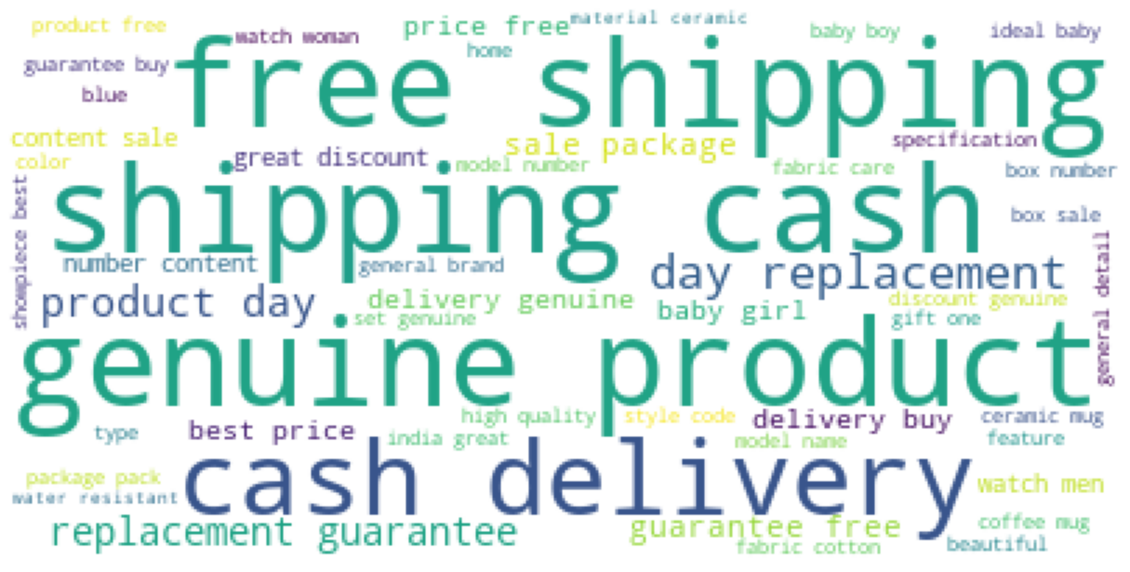

In [147]:
def display_wordcloud(corpus_list):
    plt.figure(figsize=(20, 20))
    # so that we can display a lot of images in the same cell
    rows = len(corpus_list)
    columns = 1
    for i, corpus in enumerate(corpus_list):
        wordcloud = WordCloud(background_color='white',
                              stopwords=[],
                              max_words=50).generate(" ".join(corpus))
        plt.subplot(rows, columns, i + 1)
        plt.imshow(wordcloud)
        plt.axis("off")
    #plt.show;

display_wordcloud([corpus_lem])

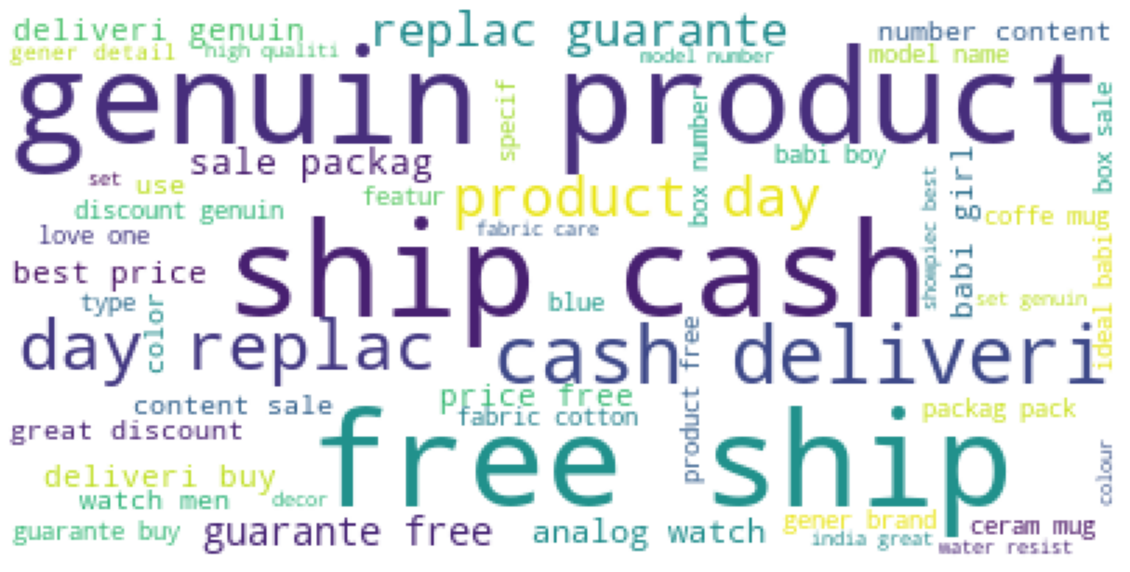

In [148]:
display_wordcloud([corpus])

#### Divide the corpus

##### 1) Separate the 7 categories

In [108]:
data = data.rename(columns={"target": "category"})

In [109]:
data

,text,category
0,Key Features of Elegance Polyester Multicolor ...,Home Furnishing
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing
4,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing
...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care
1046,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care
1047,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care
1048,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care


In [110]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data["target"] = label_encoder.fit_transform(data["category"])
data


,text,category,target
0,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4
4,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4
...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0
1046,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,0
1047,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,0
1048,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,0


In [118]:
for i in range(7):
    globals()["df_" + str(i)] = data[data.target == i]

In [119]:
df_0.head()

,text,category,target
1,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0
2,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0
40,Key Features of Mom and Kid Baby Girl's Printe...,Baby Care,0
42,Key Features of Mom and Kid Baby Girl's Printe...,Baby Care,0
63,Key Features of KOHL Wine Bag Yellow Easy to c...,Baby Care,0


In [120]:
df_6.head()

,text,category,target
5,Maserati Time R8851116001 Analog Watch - For ...,Watches,6
6,"Camerii WM64 Elegance Analog Watch - For Men,...",Watches,6
7,T STAR UFT-TSW-005-BK-BR Analog Watch - For B...,Watches,6
8,"Alfajr WY16B Youth Digital Watch - For Men, B...",Watches,6
9,TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...,Watches,6


In [121]:
for i in range(7):
    globals()["corpus_" + str(i)] = " ".join(globals()["df_" + str(i)].text)

In [122]:
corpus_0[:1000]

'Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft texture that takes care of your skin and gives you that enriched feeling you deserve. Eurospa has been exporting its bath towels to lot of renowned brands for last 10 years and is famous for its fine prints, absorbency, softness and durability. NOTE: Our product

In [123]:
len(corpus_0)

72541

In [124]:
len(corpus_6)

49083

##### 2) Process all of them

In [127]:
for i in range(7):
    print("\n\n__Before__Category__{}".format(str(i)))
    display_tokens_info(globals()["corpus_" + str(i)])



__Before__Category__0
nb tokens 72541, nb tokens uniques 93
Specifications of Sathiyas Cot
['t', 'e', 's', 'S', 'f', 'h', 'p', 'a', 'n', 'y', 'C', 'c', 'o', ' ', 'i']


__Before__Category__1
nb tokens 56618, nb tokens uniques 83
Key Features of Burt s Bees Ha
['F', 't', 'e', 's', 'H', 'K', 'f', 'a', 'r', 'u', 'y', 'o', ' ', 'B']


__Before__Category__2
nb tokens 83329, nb tokens uniques 87
Key Features of D-Link DAP1320
['F', '2', '0', 'y', 'e', 's', 'K', '1', 'n', '-', 'P', 'u', ' ', 'f', 'A', 'k', 'L', 'r', 'D', 'o', 'i', 't', 'a', '3']


__Before__Category__3
nb tokens 84704, nb tokens uniques 92
Myesquire Ceramic Burner Pot L
['y', 'e', 's', 'C', 'n', 'P', 'u', 'c', ' ', 'M', 'm', 'L', 'r', 'o', 'i', 't', 'a', 'q', 'B']


__Before__Category__4
nb tokens 57118, nb tokens uniques 84
Key Features of Elegance Polye
['F', 't', 'e', 's', 'g', 'K', 'f', 'a', 'n', 'P', 'c', 'r', 'u', 'E', 'y', 'o', ' ', 'l']


__Before__Category__5
nb tokens 95162, nb tokens uniques 85
Key Features of Du

In [128]:
for i in range(7):
    globals()["corpus_" + str(i)] = process_text_4(globals()["corpus_" + str(i)],
                          rejoin=False,
                          list_rare_words=list_unique_words,
                          eng_words=eng_words_stem)

In [129]:
for i in range(7):
    print("\n\n__After__Category__{}".format(str(i)))
    display_tokens_info(globals()["corpus_" + str(i)])



__After__Category__0
nb tokens 7813, nb tokens uniques 790
['specif', 'cotton', 'bath', 'towel', 'bath', 'towel', 'red', 'yellow', 'blue', 'bath', 'towel', 'featur', 'machin', 'washabl', 'ye', 'materi', 'cotton', 'design', 'self', 'design', 'gener', 'brand', 'type', 'bath', 'towel', 'model', 'name', 'cotton', 'bath', 'towel']
['towel', 'type', 'washabl', 'featur', 'gener', 'bath', 'machin', 'red', 'cotton', 'ye', 'name', 'blue', 'specif', 'design', 'materi', 'brand', 'self', 'yellow', 'model']


__After__Category__1
nb tokens 5050, nb tokens uniques 769
['key', 'featur', 'burt', 'bee', 'hair', 'repair', 'shea', 'grapefruit', 'deep', 'condition', 'ideal', 'boy', 'girl', 'appli', 'deep', 'condit', 'hair', 'condit', 'damag', 'hair', 'hair', 'type', 'dri', 'hair', 'specif', 'burt', 'bee', 'hair', 'repair', 'shea']
['hair', 'type', 'burt', 'featur', 'deep', 'ideal', 'dri', 'condit', 'appli', 'grapefruit', 'bee', 'condition', 'specif', 'boy', 'damag', 'girl', 'repair', 'key', 'shea']


__A

In [149]:
corpus_list = [globals()["corpus_" + str(i)] for i in range(7)]

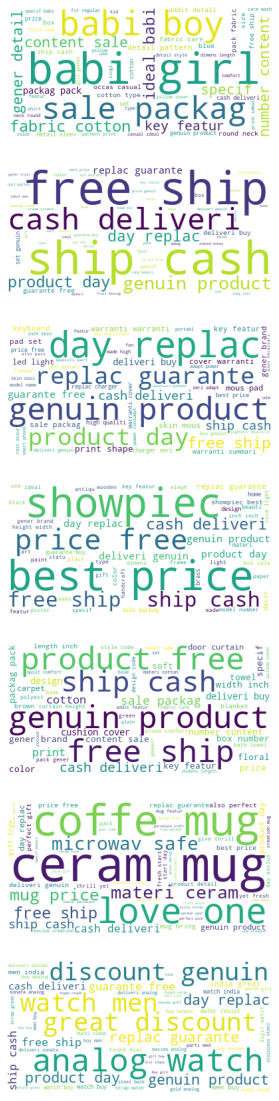

In [150]:
display_wordcloud(corpus_list)

In [154]:
pd.Series(corpus_0).value_counts().head(20)

babi      316
girl      197
cotton    191
detail    180
fabric    164
boy       112
print     105
dress     105
specif    100
ideal      98
gener      96
featur     88
packag     88
sleev      86
type       85
sale       85
color      83
wash       80
neck       80
number     76
dtype: int64

In [153]:
pd.Series(corpus_6).value_counts().head(20)

watch       354
analog      256
men         158
product     136
day         136
deliveri    134
replac      134
cash        134
ship        134
free        134
guarante    134
genuin      134
discount    134
great       134
india       134
buy         134
dial         90
strap        79
boy          67
resist       55
dtype: int64

##### Doublons ****

In [ ]:
n = 10
doublons = [i for i in pd.Series(corpus_0).value_counts().head(20).index if i in pd.Series(corpus_1).value_counts().head(n).index]

doublons

In [162]:
n = 20
doublons = [i for i in pd.Series(corpus_0).value_counts().head(20).index if i in pd.Series(corpus_1).value_counts().head(n).index]

doublons

['type', 'color']

In [164]:
n = 30
doublons = [i for i in pd.Series(corpus_0).value_counts().head(20).index if i in pd.Series(corpus_1).value_counts().head(n).index]

doublons

['specif', 'ideal', 'gener', 'featur', 'type', 'color']

In [166]:
duplicated_words = []

##### 3) 5th cleaning function

In [167]:
def process_text_5(doc,
                   rejoin=False,
                   lem_or_stem="stem",
                   list_rare_words=None,
                   min_len_word=3,
                   force_is_alpha=True,
                   eng_words=None,
                   extra_words=None):
    """
    df v4 but exclude an extra list

    positional arguments :
    -----------------------
    :param doc: (string) the document (aka a text in str format) to process

    opt args :
    -----------------------
    :param rejoin: (bool) if True return a string else return the list of tokens
    :param lem_or_stem: (str) if lem do lemmatise else stem
    :param list_rare_words: (list) a list of rare words to exclude
    :param min_len_word: (int) the minimum length if words to not exclude
    :param force_is_alpha: (int) if 1, exclude all tokens with a numeric character
    :param eng_words: (list) list of english words
    :param extra_words: (list) list of duplicate values
    :return: (string) if rejoin is True or (list) a list of tokens
    """

    # list_unique_words
    if not list_rare_words: # if not None == True
        list_rare_words = []

    # extra_words
    if not extra_words:
        extra_words = []

    # lower and strip
    doc = doc.lower().strip()

    # tokenize
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(doc)

    # remove stop words
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]

    # drop rare tokens
    non_rare_tokens = [w for w in cleaned_tokens_list if w not in list_rare_words]

    # keep only len word > N
    more_than_N = [w for w in non_rare_tokens if len(w) >= min_len_word]

    # keep only alpha not num
    if force_is_alpha:
        alpha_num = [w for w in more_than_N if w.isalpha()]
    else:
        alpha_num = more_than_N

    # stem or lem
    if lem_or_stem == "lem":
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(i) for i in alpha_num]
    else:
        trans = PorterStemmer()
        trans_text = [trans.stem(i) for i in alpha_num]

    # in english
    if eng_words:
        english_text = [i for i in trans_text if i in eng_words]
    else:
        english_text = trans_text

    ####################

    # drop extra words tokens
    final = [w for w in english_text if w not in extra_words]

    ####################

    # manage return type
    if rejoin:
        return " ".join(final)
    return final

#### Final cleaning

In [168]:
def final_clean(doc):
    """
    Performs our final cleaning
    :param doc:
    :return:
    """
    new_doc = process_text_5(doc,
                             rejoin=True,
                             lem_or_stem="stem",
                             list_rare_words=list_unique_words,
                             eng_words=eng_words_stem,
                             extra_words=duplicated_words)
    return new_doc

In [173]:
# data["clean_text"] = data.text.apply(final_clean)
df = data.copy()
df["clean_text"] = df.text.parallel_apply(final_clean)

AttributeError: module '__main__' has no attribute '__spec__'

In [171]:
data.sample(20)

,text,category,target
731,Specifications of Tidy Green Cotton Kitchen Li...,Home Furnishing,4
559,Times 101B0101 Sports Analog Watch - For Boys...,Watches,6
283,Specifications of Yves Bertelin YBSCR557 Analo...,Watches,6
979,Specifications of dongli Striped Baby Boy's Po...,Baby Care,0
987,Hand Art Terracotta Mask Showpiece - 28 cm (...,Home Decor & Festive Needs,3
505,Maxima 24990LMLI Swarovski Analog Watch - For...,Watches,6
489,Buy Lapguard HP Pavilion DV4129EA Compatible B...,Computers,2
11,"Cartier W6701005 Analog Watch - For Boys, Men...",Watches,6
723,Buy House This Yellow 150 cm Table Runner at R...,Home Furnishing,4
25,Alfajr WQ18 Qibla Compass Digital Watch - For...,Watches,6


In [ ]:
sub_data = data[data.target == 0]

for index, series in sub_data.sample(10).iterrows():
    print(series["text"])
    print(series["clean_text"])
    print()

In [174]:
# check no missing values
data.isna().mean()

text        0.0
category    0.0
target      0.0
dtype: float64

In [176]:
# save
data.to_csv("dataset/text/cleaned/final_data_text", index=False)

### 1) Pré-traitement : Exploration et Nettoyage de notre corpus de textes

#### 1.1) Récupération du corpus

In [91]:
corpus = data["description"]

KeyError: 'description'

In [ ]:
first_document = corpus[0]

In [ ]:
first_document

#### 1.2) Tokenization

In [ ]:
sentence = corpus[0]

In [ ]:
tokens_1 = nltk.wordpunct_tokenize(sentence)
len(tokens_1)
tokens_1

In [ ]:
nltk.download('punkt')

In [ ]:
tokens_2 = nltk.word_tokenize(sentence)
len(tokens_2)

In [ ]:
diff = [i for i in tokens_1 if i not in tokens_2]
diff


In [ ]:
text = nltk.Text(tokens_1)
text

In [ ]:
len(text)

In [ ]:
# normalisation
words = [w.lower() for w in text]
vocab = sorted(set(words)) # set to get only different tokens and sorted to get a sorted list of the set

In [ ]:
len(words)

In [ ]:
len(vocab)

#### 1.3) Normalisation

In [ ]:
# 1) texte / 2) images (paralleles can do)
# 1 vocab pour chaque doc

# texte :
# nettoyage du texte / normalisation (pré ttt cf notebook)
# bag of words
# reduction dimension tSNE ici
# 7 clusters
# ARI score : sur la valeur à obtenir 0.4/0.5 (0.6 ou 0.7)
# objectifs : cours OC x2 + webinair / Youtube
# vendredi

##### 1) supprimer les stopwords

## Part II : Dimension Reduction

In [ ]:
# pour le texte : permet de visualiser en 2D ACP / tSNE


## Part III : Clustering

In [ ]:
# End of notebook time
t1 = time()
print("computing time : {:8.6f} sec".format(t1 - t0))
print("computing time : " + strftime('%H:%M:%S', gmtime(t1 - t0)))